# Crop Disease Prediction using ML

### Importing Packages

In [1]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

In [2]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = "C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train"


In [3]:
# Import the VG model and here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# We don't need to train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [5]:
# Folders in the Training Set
folders = glob('C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\*')
folders

['C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Bacterial_spot',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Early_blight',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___healthy',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Late_blight',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Leaf_Mold',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Septoria_leaf_spot',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Target_Spot',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Tomato_mosaic_virus',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
# Model layers -> can add more if required
x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# Create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Training Generator
training_set = train_datagen.flow_from_directory('C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14532 images belonging to 10 classes.


In [11]:
# Testing Generator
test_set = test_datagen.flow_from_directory('C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3628 images belonging to 10 classes.


In [12]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\rashm\AppData\Local\Temp\ipykernel_4812\2655456400.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
455/455 [==============================] - 189s 388ms/step - loss: 0.7768 - accuracy: 0.7541 - val_loss: 0.3934 - val_accuracy: 0.8658
Epoch 2/50
455/455 [==============================] - 182s 400ms/step - loss: 0.4479 - accuracy: 0.8492 - val_loss: 0.4682 - val_accuracy: 0.8476
Epoch 3/50
455/455 [==============================] - 181s 396ms/step - loss: 0.3683 - accuracy: 0.8783 - val_loss: 0.4209 - val_accuracy: 0.8630
Epoch 4/50
455/455 [==============================] - 187s 411ms/step - loss: 0.3381 - accuracy: 0.8910 - val_loss: 0.3295 - val_accuracy: 0.8922
Epoch 5/50
455/455 [==============================] - 181s 398ms/step - loss: 0.2623 - accuracy: 0.9115 - val_loss: 0.5527 - val_accuracy: 0.8586
Epoch 6/50
455/455 [==============================] - 180s 395ms/step - loss: 0.2748 - accuracy: 0.9116 - val_loss: 0.4263 - val_accuracy: 0.8765
Epoch 7/50
455/455 [==============================] - 178s 391ms/step - loss: 0.2951 - accuracy: 0.9063 - val_loss: 0.5715 -

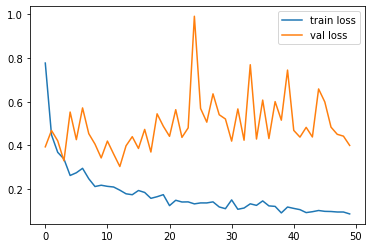

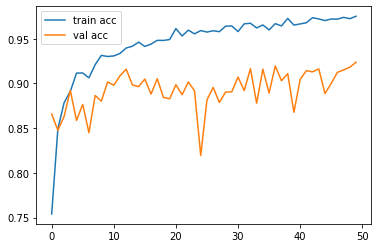

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('VGG19LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('VGG19AccVal_acc')

In [17]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_Vgg19.h5')